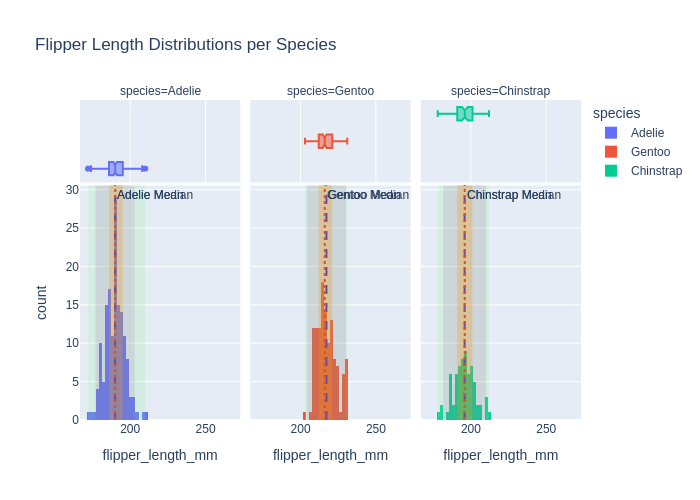

In [23]:
1.    

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

fig = px.histogram(penguins, x='flipper_length_mm', color='species', marginal="box", 
                   facet_col="species", nbins=30, title="Flipper Length Distributions per Species")
for species in penguins['species'].unique():
    subset = penguins[penguins['species'] == species]
    
    mean_val = subset['flipper_length_mm'].mean()
    median_val = subset['flipper_length_mm'].median()
    std_val = subset['flipper_length_mm'].std()
    min_val = subset['flipper_length_mm'].min()
    max_val = subset['flipper_length_mm'].max()
    q1 = subset['flipper_length_mm'].quantile(0.25)
    q3 = subset['flipper_length_mm'].quantile(0.75)

    std_range_lower = mean_val - 2 * std_val
    std_range_upper = mean_val + 2 * std_val

    fig.add_vline(x=mean_val, line=dict(color='blue', dash='dash'), annotation_text=f"{species} Mean", row=1, col=penguins['species'].unique().tolist().index(species)+1)
    fig.add_vline(x=median_val, line=dict(color='red', dash='dot'), annotation_text=f"{species} Median", row=1, col=penguins['species'].unique().tolist().index(species)+1)

    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="lightgreen", opacity=0.2, row=1, col=penguins['species'].unique().tolist().index(species)+1)

    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.3, row=1, col=penguins['species'].unique().tolist().index(species)+1)
    
    fig.add_vrect(x0=std_range_lower, x1=std_range_upper, line_width=0, fillcolor="purple", opacity=0.1, row=1, col=penguins['species'].unique().tolist().index(species)+1)

fig.show(renderer="png")

In [9]:
2. 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

penguins  

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


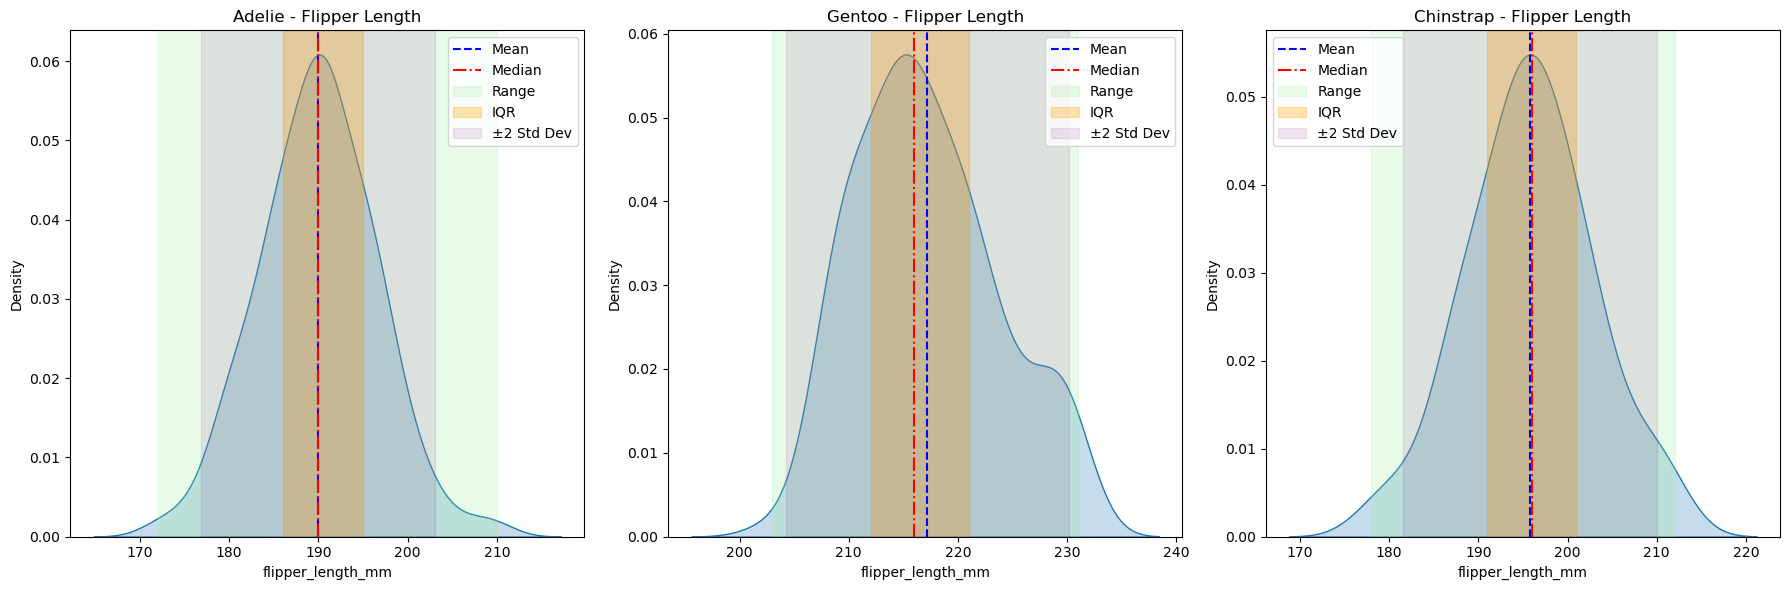

In [12]:
2.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

species_list = penguins['species'].unique()

for i, species in enumerate(species_list):
    subset = penguins[penguins['species'] == species]
    
    mean_val = subset['flipper_length_mm'].mean()
    median_val = subset['flipper_length_mm'].median()
    std_val = subset['flipper_length_mm'].std()
    min_val = subset['flipper_length_mm'].min()
    max_val = subset['flipper_length_mm'].max()
    q1 = subset['flipper_length_mm'].quantile(0.25)
    q3 = subset['flipper_length_mm'].quantile(0.75)
    
    std_range_lower = mean_val - 2 * std_val
    std_range_upper = mean_val + 2 * std_val
    
    sns.kdeplot(subset['flipper_length_mm'], ax=axes[i], fill=True)
    axes[i].set_title(f"{species} - Flipper Length") 
    
    axes[i].axvline(mean_val, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_val, color='red', linestyle='-.', label='Median')
        
    axes[i].axvspan(min_val, max_val, color='lightgreen', alpha=0.2, label='Range')
    
    axes[i].axvspan(q1, q3, color='orange', alpha=0.3, label='IQR')

    axes[i].axvspan(std_range_lower, std_range_upper, color='purple', alpha=0.1, label='±2 Std Dev')
    axes[i].legend()

plt.tight_layout()
    
plt.show()

3. 

Actually it depends, but I prefer the kenel density estimators as the visualization method. 

Here is my rationale:
    Firstly, KDE does not rely on bin size, so it avoids histogram binning issues. Secondly, it can provide detailed view of data contributions, but box plots cannot. lastly, KDE provides more detailed information than other two methods for its smooth and continuous estimate of data distribution. 


1,2,3 

ChatBot Session Summary:
    
   In this session, you initially asked about how to use plotly to create histograms of flipper_length_mm for each species in the penguins dataset, with vertical lines marking the mean and median, and shaded areas representing the range, interquartile range (IQR), and two standard deviations from the mean. I provided a detailed solution using plotly methods like add_vline() and add_vrect().

   Next, you wanted to implement the same concept using Seaborn’s Kernel Density Estimation (KDE) plots instead of histograms. I gave you a solution using seaborn.kdeplot() along with axvline() and axvspan() to mark the necessary statistical elements, with the plots arranged in a row of three.

   Lastly, you shared your contrasting descriptions of box plots, histograms, and KDE plots, and asked if I agreed with your assessment. I agreed and expanded on the pros and cons of each visualization method, explaining how they work, their strengths, and their limitations in data analysis.

   Link: https://chatgpt.com/share/66f5bccb-2b5c-8006-bc78-cbb1e609cfc6

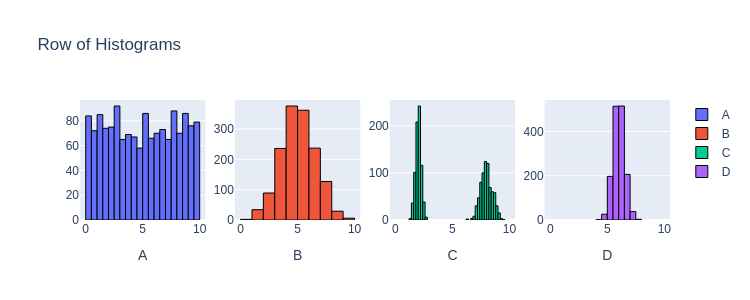

In [22]:
4. 

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")


4.

(1). B,D
(2). A,B
(3). C,D
(4). A,C

5. 

  Right Skewness: Mean > Median. This occurs when the tail on the right side is longer due to higher outliers.
  Left Skewness: Mean < Median. This occurs when the tail on the left side is longer due to lower outliers.

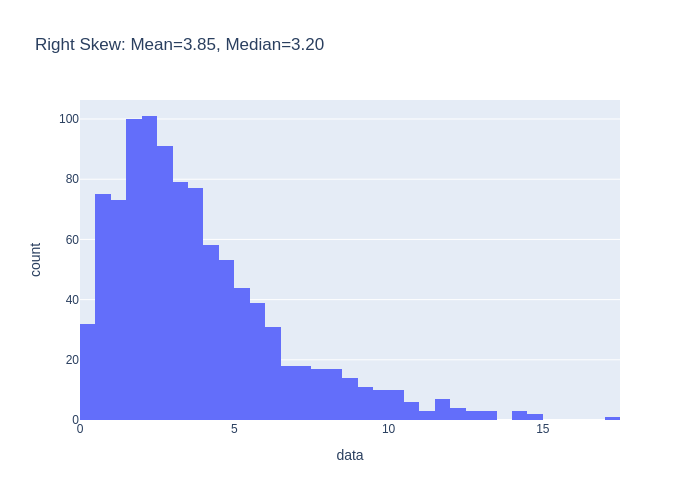

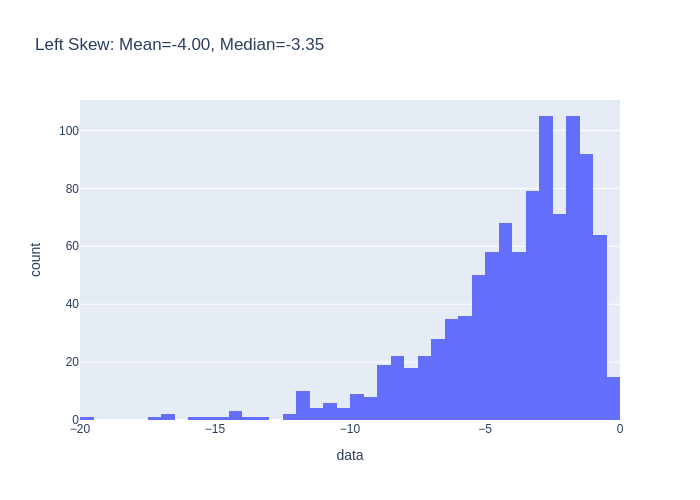

In [4]:
5. 

import plotly.express as px

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title=f"Right Skew: Mean={mean1:.2f}, Median={median1:.2f}")
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title=f"Left Skew: Mean={mean2:.2f}, Median={median2:.2f}")

fig1.show(renderer="png")
fig2.show(renderer="png")

5. 

ChatBot Session Summary

	1.	Skewness and Relationship Between Mean and Median:
	We explored the general relationship between mean and median in skewed distributions:In right-skewed distributions, the mean is typically greater than the median because the mean is pulled toward the larger values on the right tail.In left-skewed distributions, the mean is usually less than the median due to smaller values pulling the mean downward.
	2.	Code Explanation:The code provided generates random samples from a gamma distribution and creates a histogram using plotly (though px is assumed to be imported but not shown).It calculates both the mean and the median (50th percentile) of the generated sample.A second set of random values is generated from the negative gamma distribution by multiplying gamma-distributed samples by -1.
    
    Link: https://chatgpt.com/share/66f5e95b-4edc-8006-8b54-9534e2c1ace6

In [10]:
6. 

import pandas as pd
url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/cocktails.csv"
df_cocktails= pd.read_csv(url)
df_cocktails

,row_id,drink,date_modified,id_drink,alcoholic,category,drink_thumb,glass,iba,video,ingredient_number,ingredient,measure
0,0,'57 Chevy with a White License Plate,2016-07-18T22:49:04Z,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,NaN,1,Creme de Cacao,1 oz white
1,0,'57 Chevy with a White License Plate,2016-07-18T22:49:04Z,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,NaN,2,Vodka,1 oz
2,1,1-900-FUK-MEUP,2016-07-18T22:27:04Z,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,NaN,1,Absolut Kurant,1/2 oz
3,1,1-900-FUK-MEUP,2016-07-18T22:27:04Z,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,NaN,2,Grand Marnier,1/4 oz
4,1,1-900-FUK-MEUP,2016-07-18T22:27:04Z,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,NaN,3,Chambord raspberry liqueur,1/4 oz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,544,Zorbatini,2017-01-28T16:32:35Z,16963,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Cocktail glass,NaN,NaN,1,Vodka,1 1/4 oz Stoli
2100,544,Zorbatini,2017-01-28T16:32:35Z,16963,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Cocktail glass,NaN,NaN,2,Ouzo,1/4 oz
2101,545,Zorro,2017-01-28T16:34:43Z,15328,Alcoholic,Coffee / Tea,http://www.thecocktaildb.com/images/media/drin...,Coffee Mug,NaN,NaN,1,Sambuca,2 cl
2102,545,Zorro,2017-01-28T16:34:43Z,15328,Alcoholic,Coffee / Tea,http://www.thecocktaildb.com/images/media/drin...,Coffee Mug,NaN,NaN,2,Bailey's irish cream,2 cl


In [12]:
6. 

common_categories = df_cocktails['category'].value_counts()
common_categories

category
Ordinary Drink          1060
Cocktail                 244
Punch / Party Drink      187
Shot                     152
Other/Unknown            124
Coffee / Tea              81
Milk / Float / Shake      75
Homemade Liqueur          71
Cocoa                     41
Soft Drink / Soda         37
Beer                      32
Name: count, dtype: int64

In [13]:
6. 

common_glasses = df_cocktails['glass'].value_counts()
common_glasses

glass
Cocktail glass              435
Highball glass              302
Collins Glass               269
Old-fashioned glass         213
Collins glass               144
Shot glass                   98
Whiskey sour glass           83
Highball Glass               75
Coffee mug                   64
Punch bowl                   55
Champagne flute              41
Hurricane glass              29
Pitcher                      28
Irish coffee cup             26
Beer mug                     24
Pint glass                   24
Coffee Mug                   20
Beer pilsner                 18
Margarita/Coupette glass     17
Wine Glass                   16
Old-Fashioned glass          16
White wine glass             15
Cocktail Glass               14
Martini Glass                14
Mason jar                     9
Parfait glass                 8
Punch Bowl                    7
Brandy snifter                6
Shot Glass                    6
Margarita glass               5
Jar                           5
Po

In [14]:
6. 

common_ingredients = df_cocktails['ingredient'].value_counts()
common_ingredients

ingredient
Vodka                   88
Gin                     84
Sugar                   70
Orange juice            57
Lemon juice             51
                        ..
Maui                     1
Olive Brine              1
Blackcurrant cordial     1
Peach Bitters            1
Fruit juice              1
Name: count, Length: 333, dtype: int64

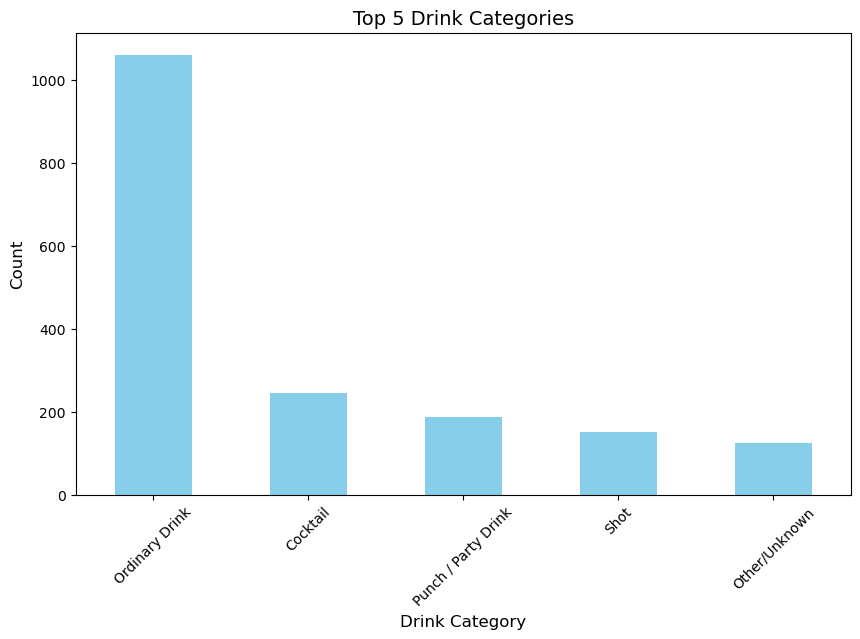

In [15]:
6. 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
common_categories.head().plot(kind='bar', color='skyblue')
plt.title("Top 5 Drink Categories", fontsize=14)
plt.xlabel("Drink Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

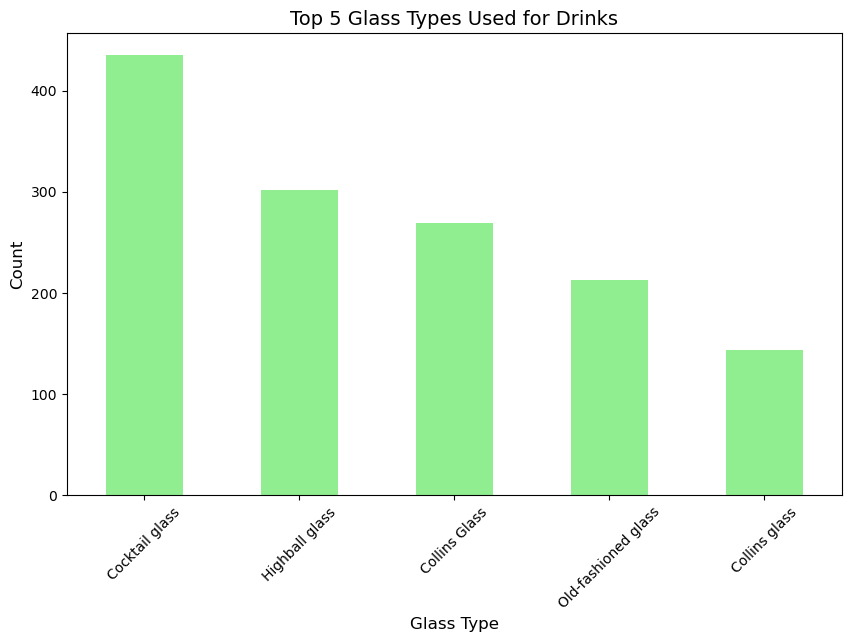

In [16]:
6. 

plt.figure(figsize=(10, 6))
common_glasses.head().plot(kind='bar', color='lightgreen')
plt.title("Top 5 Glass Types Used for Drinks", fontsize=14)
plt.xlabel("Glass Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

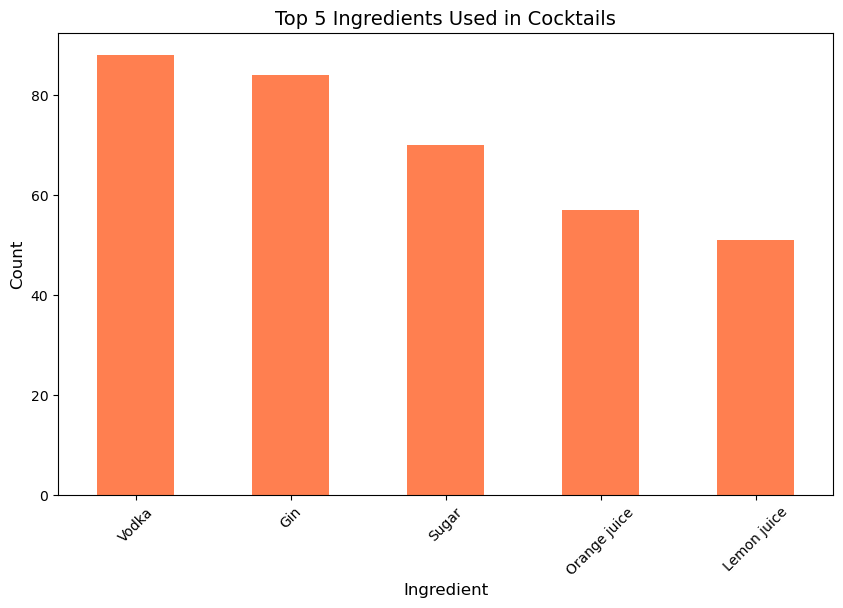

In [24]:
6. 

plt.figure(figsize=(10, 6))
common_ingredients.head().plot(kind='bar', color='coral')
plt.title("Top 5 Ingredients Used in Cocktails", fontsize=14)
plt.xlabel("Ingredient", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

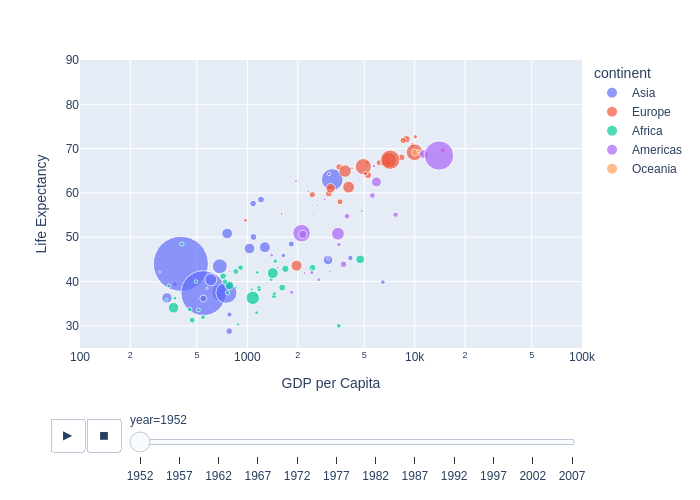

In [20]:
7. 

import plotly.express as px
import pandas as pd


url_gapminder = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
df_gapminder = pd.read_csv(url_gapminder)

fig = px.scatter(df_gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country", 
                 log_x=True, size_max=60, range_x=[100,100000], range_y=[25,90],
                 labels={"gdpPercap": "GDP per Capita", "lifeExp": "Life Expectancy"})
fig.show(renderer="png")

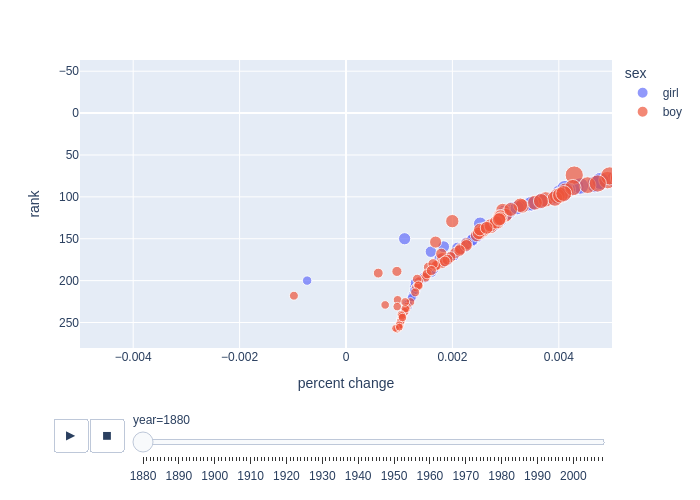

In [19]:
8. 

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] 
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] 
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) 
fig.update_yaxes(autorange='reversed') 
fig.show(renderer="png") 

9.   Somewhat